# Example usage

Here we will demonstrate how to use `pyadps` in a Jupyter Notebook.

In [149]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import pyadps
import matplotlib.pyplot as plt
# %matplotlib inline

### **Read and access data**

In [62]:
ds = pyadps.ReadFile('demo.000')

In [63]:
# Listing data from velocity[beams, cells, ensembles]
ds.velocity.data[0, 0, 300:310]

array([ -61,  -52,  -54, -104, -145, -157, -153,  -93, -103, -122],
      dtype=int16)

In [64]:
# Listing other attributes of velocity
print('Velocity units: ', ds.velocity.unit)
print('Missing values: ', ds.velocity.missing_value)

Velocity units:  mm/s
Missing values:  -32768


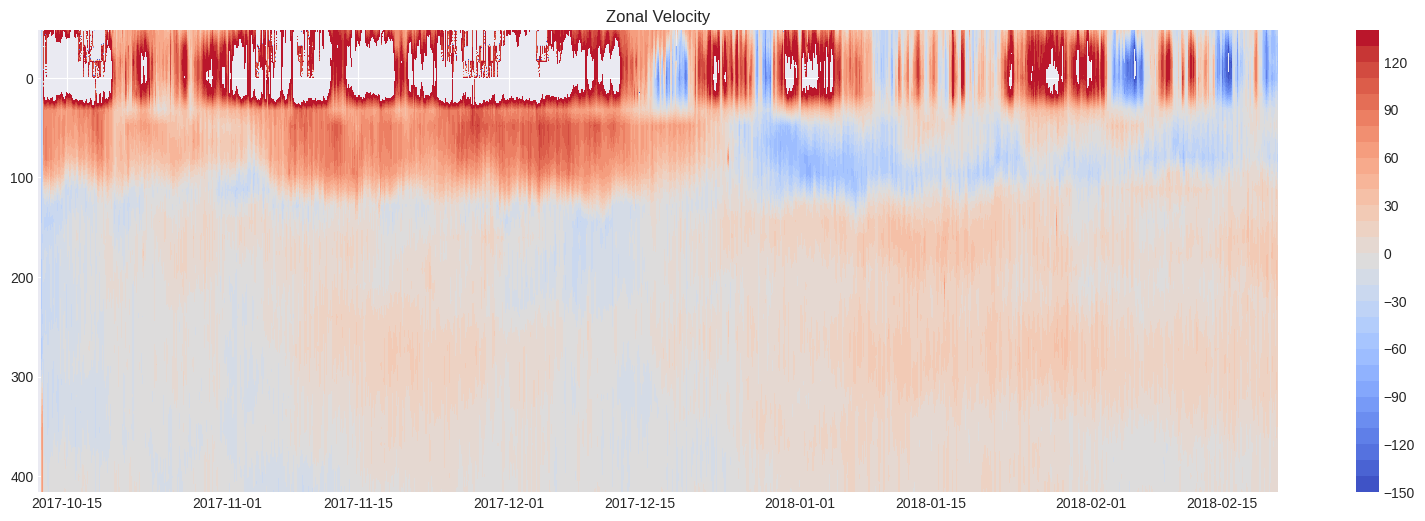

In [98]:
X, Y = np.meshgrid(ds.time, ds.depth)
levels = np.arange(-150, 150, 10)
plt.figure(figsize = (20,6))
cs = plt.contourf(X, Y, ds.velocity.data[0, :, :]/10, 
                  cmap ="coolwarm", levels=levels) 
ax = cs.axes
ax.invert_yaxis()
plt.title("Zonal Velocity")
plt.colorbar(cs)
plt.show()

**Data Types**

All ensemble-dependent data (or time-dependent data) are available in either fixedleader or variableleader. Data such as Velocity, Echo Intensity, Correlation, and Percent Good are 3D arrays, varying as functions of beams, cells, and ensembles. 

In [112]:
# List of available data types, attributes and methods
list(vars(ds).keys())[0:10]

['fileheader',
 'fixedleader',
 'variableleader',
 'velocity',
 'correlation',
 'echo',
 'percentgood',
 'time',
 'depth',
 'filename']

In [67]:

# An example to access variable leader data

temp = ds.temperature

print(temp.description)


Contains the temperature of the water at the transducer head (ET command). This value may be a manual setting or a reading from a temperature sensor.


In [68]:
ds.ez_sensor(field='avail')


{'Sound Speed': False,
 'Depth Sensor': True,
 'Heading Sensor': True,
 'Pitch Sensor': True,
 'Roll Sensor': True,
 'Conductivity Sensor': False,
 'Temperature Sensor': True}

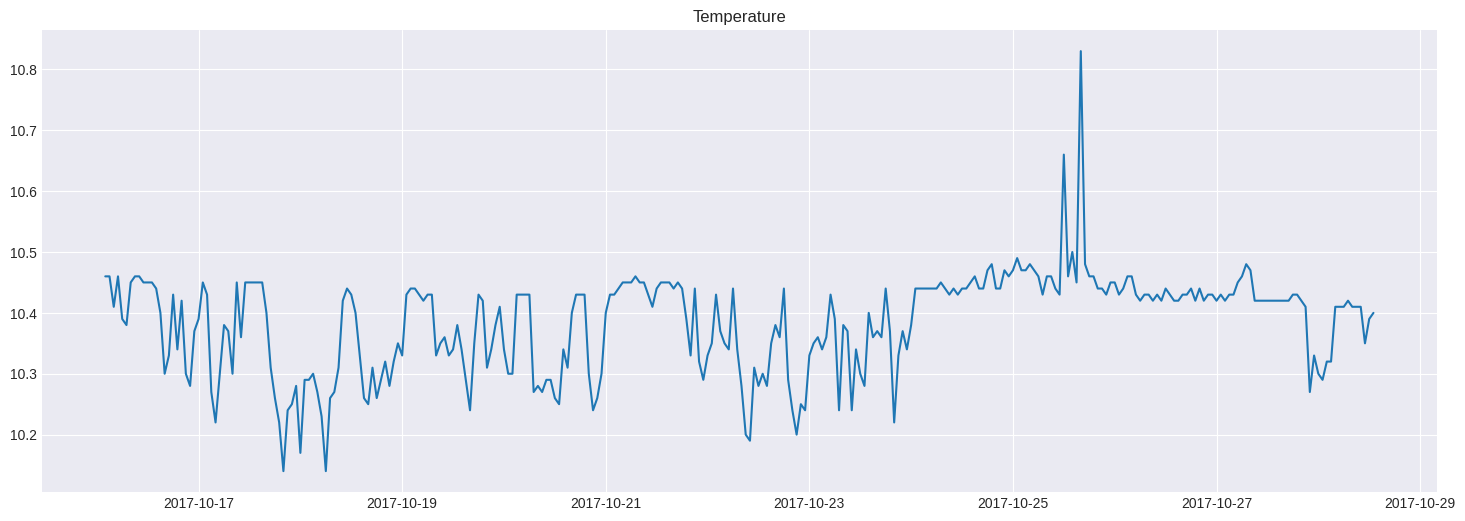

In [102]:
# Plotting data
# Temperature data are stored in a binary file without decimals or scaled by 100.
# Example: Instead of saving 25.34°C, the value 2534 is stored. Multiply by scale factor to get actual values in degrees
plt.figure(figsize = (18,6))
plt.plot(ds.time[100:400], temp.data[100:400]*temp.scale)
plt.title("Temperature")
plt.show()

In [70]:
# Display available attributes for temperature
vars(temp).keys()

dict_keys(['index', 'unit', 'scale', 'byte', 'type', 'command', 'valid_min', 'valid_max', 'long_name', 'description', 'data'])

### **Process data**

#### Create Mask File

In [135]:
mask = pyadps.default_mask(ds)

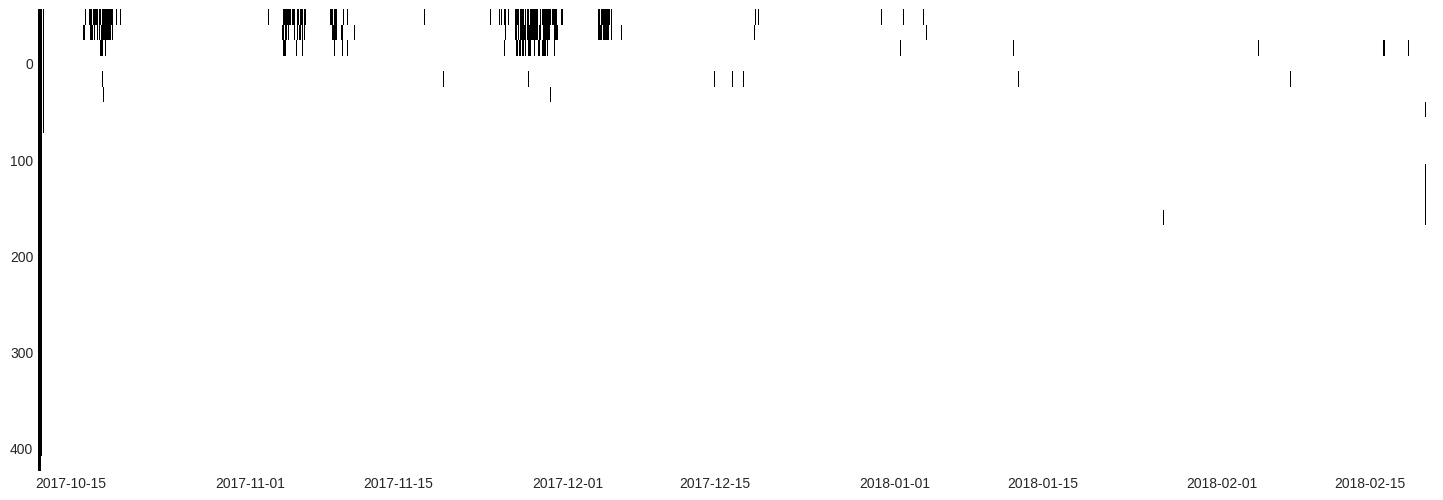

In [123]:
plt.figure(figsize = (18,6))
cs = plt.pcolor(X, Y, mask)
ax = cs.axes
ax.invert_yaxis()
plt.show()

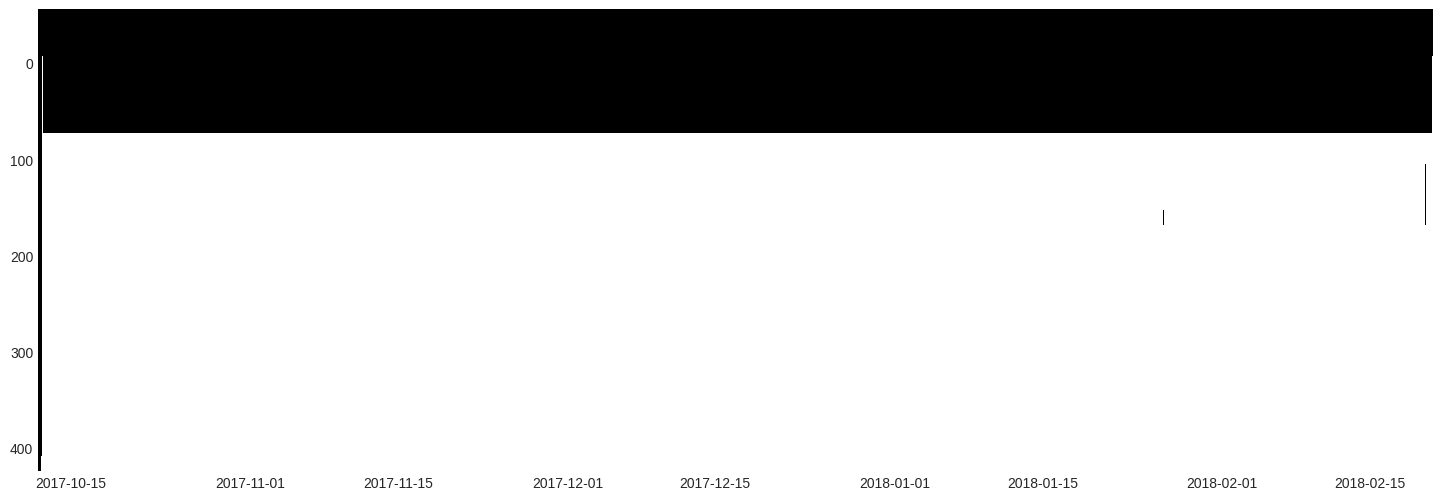

In [134]:
mask_new = pyadps.side_lobe_beam_angle(ds, mask)
plt.figure(figsize = (18,6))
cs = plt.pcolor(X, Y, mask_new)
ax = cs.axes
ax.invert_yaxis()
plt.show()
